
# Algerian Forest Fires Dataset

## Data Set Information

- The dataset includes 244 instances regrouping data from two regions of Algeria:
    - Bejaia region (northeast)
    - Sidi Bel-abbes region (northwest)
- 122 instances for each region.
- Period: June 2012 to September 2012.
- The dataset includes 11 attributes and 1 output attribute (class).
- The 244 instances are classified into:
    - Fire (138 instances)
    - Not Fire (106 instances)

## Attribute Information

1. **Date**: (DD/MM/YYYY) Day, month ('June' to 'September'), year (2012) Weather data observations
2. **Temp**: Temperature at noon (max) in Celsius degrees (22 to 42)
3. **RH**: Relative Humidity in % (21 to 90)
4. **Ws**: Wind speed in km/h (6 to 29)
5. **Rain**: Total day in mm (0 to 16.8)
6. **Fine Fuel Moisture Code (FFMC)**: Index from the FWI system (28.6 to 92.5)
7. **Duff Moisture Code (DMC)**: Index from the FWI system (1.1 to 65.9)
8. **Drought Code (DC)**: Index from the FWI system (7 to 220.4)
9. **Initial Spread Index (ISI)**: Index from the FWI system (0 to 18.5)
10. **Buildup Index (BUI)**: Index from the FWI system (1.1 to 68)
11. **Fire Weather Index (FWI)**: Index (0 to 31.1)
12. **Classes**: Two classes, namely Fire and Not Fire

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [51]:
df=pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1 )


In [52]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


DEALING WITH FEATURE ENGINEERING AND SELSCTION COUNTS FOR 30% OF THE PROJECT TIME 

it consist if 3 main topics:
1- data cleaning
2- feature engineering  
3- feature selection



### Data Cleaning Checklist for This Dataset

- Check for missing values in all columns.
- Handle dataset anomalies such as merged regions or extra rows.
- Drop missing, invalid, or empty rows.
- Remove duplicated rows (e.g., repeated header row).
- Fix column names: trim spaces and standardize case.
- Convert columns to correct data types (int or float as appropriate).
- Verify all corrections, then save the cleaned dataset for EDA.

## Data Cleaning Steps Performed

### 1. Identify and Inspect Missing Values
- Checked for rows with null values using:
    ```
    dataset[dataset.isnull().any(axis=1)]
    ```

### 2. Region-Based Split and New Column Creation
- The dataset contained two regions merged together, separated by text rows.
- Added a new `Region` column:
    - `0` = Bejaia
    - `1` = Sidi-Bel Abbes

### 3. Remove Incomplete/Null Rows
- Dropped rows with missing values:
    ```
    df.dropna()
    ```

### 4. Remove Invalid Header-Like Row
- Row at index 122 contained repeated column headers.
- Dropped explicitly:
    ```
    df.drop(122)
    ```

### 5. Fix Column Name Formatting
- Stripped leading/trailing spaces from column names:
    ```
    df.columns.str.strip()
    ```
- Ensured clean, consistent column names.

### 6. Data Type Corrections
- Converted numeric columns from object to appropriate numeric types:
    - `day`, `month`, `year`, `Temperature`, `RH`, `Ws` → `int`
    - `Rain`, `FFMC`, `DMC`, `DC`, `ISI`, `BUI`, `FWI` → `float`
    - `Region` → `int`

### 7. Verification
- Used `df.info()` and `df.describe()` to confirm data types and distributions.
- Checked for nulls again to ensure the dataset is fully cleaned.

### 8. Save Cleaned Dataset
- Saved the cleaned dataset for further analysis.

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


#Data Cleaning


In [54]:
# 1 missing values 

df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [55]:
# noticed i have 1 missing values in each feature which logicaly meand that there is row gap or smth in excel not in data itself
print(df[df.isnull().any(axis=1)])

                               day month  year Temperature   RH   Ws Rain   \
122  Sidi-Bel Abbes Region Dataset   NaN   NaN         NaN  NaN  NaN   NaN   
167                             14    07  2012          37   37   18   0.2   

     FFMC   DMC      DC   ISI   BUI      FWI Classes    
122   NaN   NaN     NaN   NaN   NaN      NaN       NaN  
167  88.9  12.9  14.6 9  12.5  10.4  fire          NaN  


In [56]:
df.loc[120:125]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,29,09,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
124,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire
125,02,06,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire


In [57]:
df.loc[165:168]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,12,07,2012,36,44,13,0,90.1,12.6,19.4,8.3,12.5,9.6,fire
166,13,07,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN
168,15,07,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire


In [58]:
# df.at[167, 'DC'] = 14.6
# df.at[167, 'ISI'] = 9.0   # if that stray "9" should be ISI
# df.at[167, 'BUI'] = 12.5
# df.at[167, 'FWI'] = 10.4
# df.at[167, 'Classes'] = 'fire'


In [59]:
# df.iloc[165:169]


In [60]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [61]:
# smart way to solve this is that the data above 122 is for region beraji and after 122 is for sidi bel area
# since that will add coulmn of  classes  of 0 and 1 where 0 is the are of beraji and 1 sisdi bel

df.loc[:122,'Region']=0
df.loc[122:,'Region']=1

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       246 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.0+ KB


In [63]:
# region should be int as it is categorial so not float

df[['Region']]=df[['Region']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  Region       246 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 29.0+ KB


In [64]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
Region         0
dtype: int64

In [65]:
# now dropping all na 
df=df.dropna().reset_index(drop=True)
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [66]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [67]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [68]:
# now we can see there are duplicated heaset so we going to drop it 

df=df.drop(122).reset_index(drop=True)


In [69]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [70]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [71]:
# there is issue with , 'Classes  ', ''] as there is extra spce in it 

df.columns=df.columns.str.strip() #fixing the spaces issue
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    object
 1   month        243 non-null    object
 2   year         243 non-null    object
 3   Temperature  243 non-null    object
 4   RH           243 non-null    object
 5   Ws           243 non-null    object
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 28.6+ KB


In [73]:
# now i want to change the object to int or float 

# 0   day          243 non-null    object      --> int64
#  1   month        243 non-null    object     --> int64
#  2   year         243 non-null    object     --> int64
#  3   Temperature  243 non-null    object     --> int64
#  4   RH           243 non-null    object     --> int64
#  5   Ws           243 non-null    object     --> int64
#  6   Rain         243 non-null    object     --> float
#  7   FFMC         243 non-null    object     --> float
#  8   DMC          243 non-null    object     --> float
#  9   DC           243 non-null    object     --> float
#  10  ISI          243 non-null    object     --> float
#  11  BUI          243 non-null    object     --> float
#  12  FWI          243 non-null    object     --> float
#  13  Classes      243 non-null    object     --> float
#  14  Region       243 non-null    int64 

In [74]:
# df[['x','y','z']] = df[['x','y','z']].astype(int)

df[['month','day','year','Temperature','RH','Ws']]=df[['month','day','year','Temperature','RH','Ws']].astype(int)


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [76]:
# for larger datasets when we need to change to float and also classes wont be float as it will
#  be encoded hence we will write function

obj = [features for features in df.columns if df[features].dtypes=='object'] # CONDITION

for i in obj :
    if i != 'Classes':
        df[i]=df[i].astype(float)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [78]:
df.describe()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [79]:
df.head()


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [80]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

*Exploratory Data Analysis*


## EDA Steps Checklist

**Feature Selection / Dropping Irrelevant Columns**
- Dropped `day`, `month`, `year` as they are not useful as raw features.

**Target Variable Exploration**
- Checked categories in `Classes` using `value_counts()`.
- Encoded target variable: `0 = not fire`, `1 = fire`.

**Distribution of Features**
- Plotted histograms/density plots for all numerical features to spot skewness, ranges, and outliers.

**Target Distribution Visualization**
- Pie chart showing percentage of fire vs not fire.

**Correlation Analysis**
- Computed correlation matrix (`df.corr()`).
- Visualized with heatmap to show relationships between features and with target.

**Outlier Detection**
- Boxplots for selected numerical features (e.g., FWI).

**Temporal/Seasonal Analysis**
- Monthly fire analysis using countplots (`sns.countplot`) grouped by region and classes.
- Observed seasonality: fires peaked in June–August.


In general when of common steps in eda are:

- step 1 : Data reductione -> removing uncessary coulmns
- step 2 : target variable -> choosing the target variable and do coplete exploration and and fixes needed encoding etc
- step 3 : Feature distrubitions -> histograms , box plots , scatter plots
- step 4 : Target Distribution -> Class imbalance checking pie chart , count plot
- step 5 : corellations ->  Heatmap to visualize correlation between features and with target  AND also checking the correlation values to drop highly corelated features as they can create multicollinearity issues
- step 6 : Outliesrs detection -> box plots for selected numerical features
- step 7 : trends-> seasonal trends using time seires analysis

In [81]:
df2= df

In [82]:
df2.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [83]:
# now when i will drop coulmns that useless as 
# what i want to do is that i want to perdeict baseed on  the input features if
# fire will happen or not so will remove any coulmns that wont help me in that

df2.drop(['day','month','year'], axis=1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [84]:
df2['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [85]:
# as u can see in suppose to have only 2 classes fire , not fire 
# but bec of the spacing it go divided in many classes
# and since it is categorial so it will be encoded anyways 

# where(condition, [x, y], /)
df2['Classes']= np.where(df2['Classes'].str.contains('not fire'),0,1)



In [86]:
df2.head(10)

# not fire = 0 
# fire = 1


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
5,6,6,2012,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,0
6,7,6,2012,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,0
7,8,6,2012,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,0
9,10,6,2012,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,0


In [87]:
df2['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

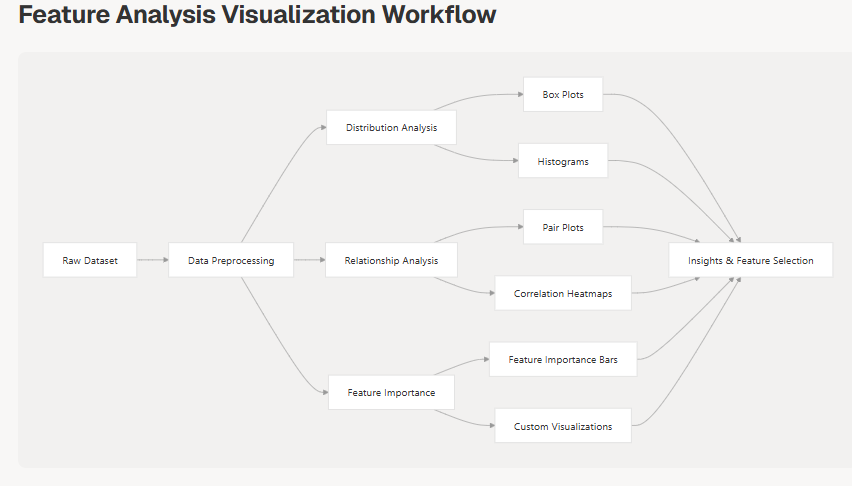

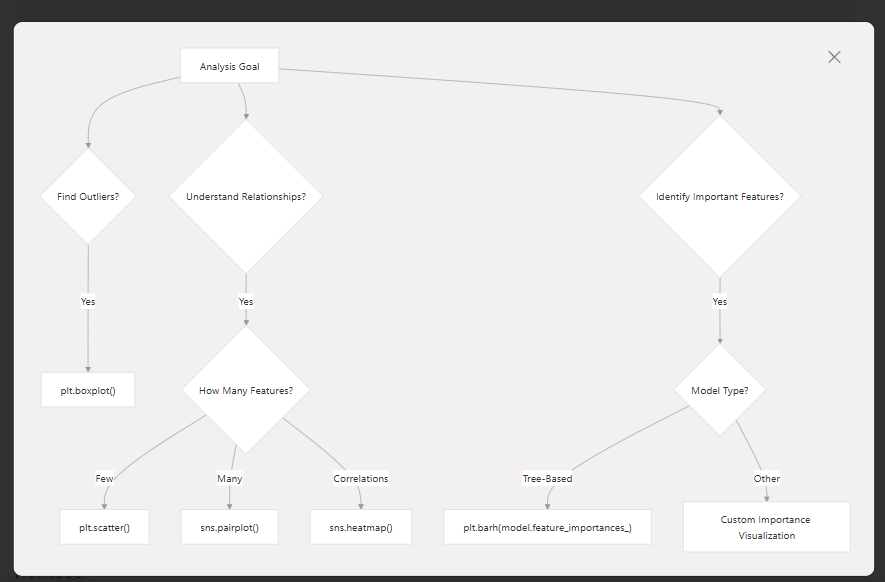

In [88]:
df2.drop(['day','month','year'], axis=1)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


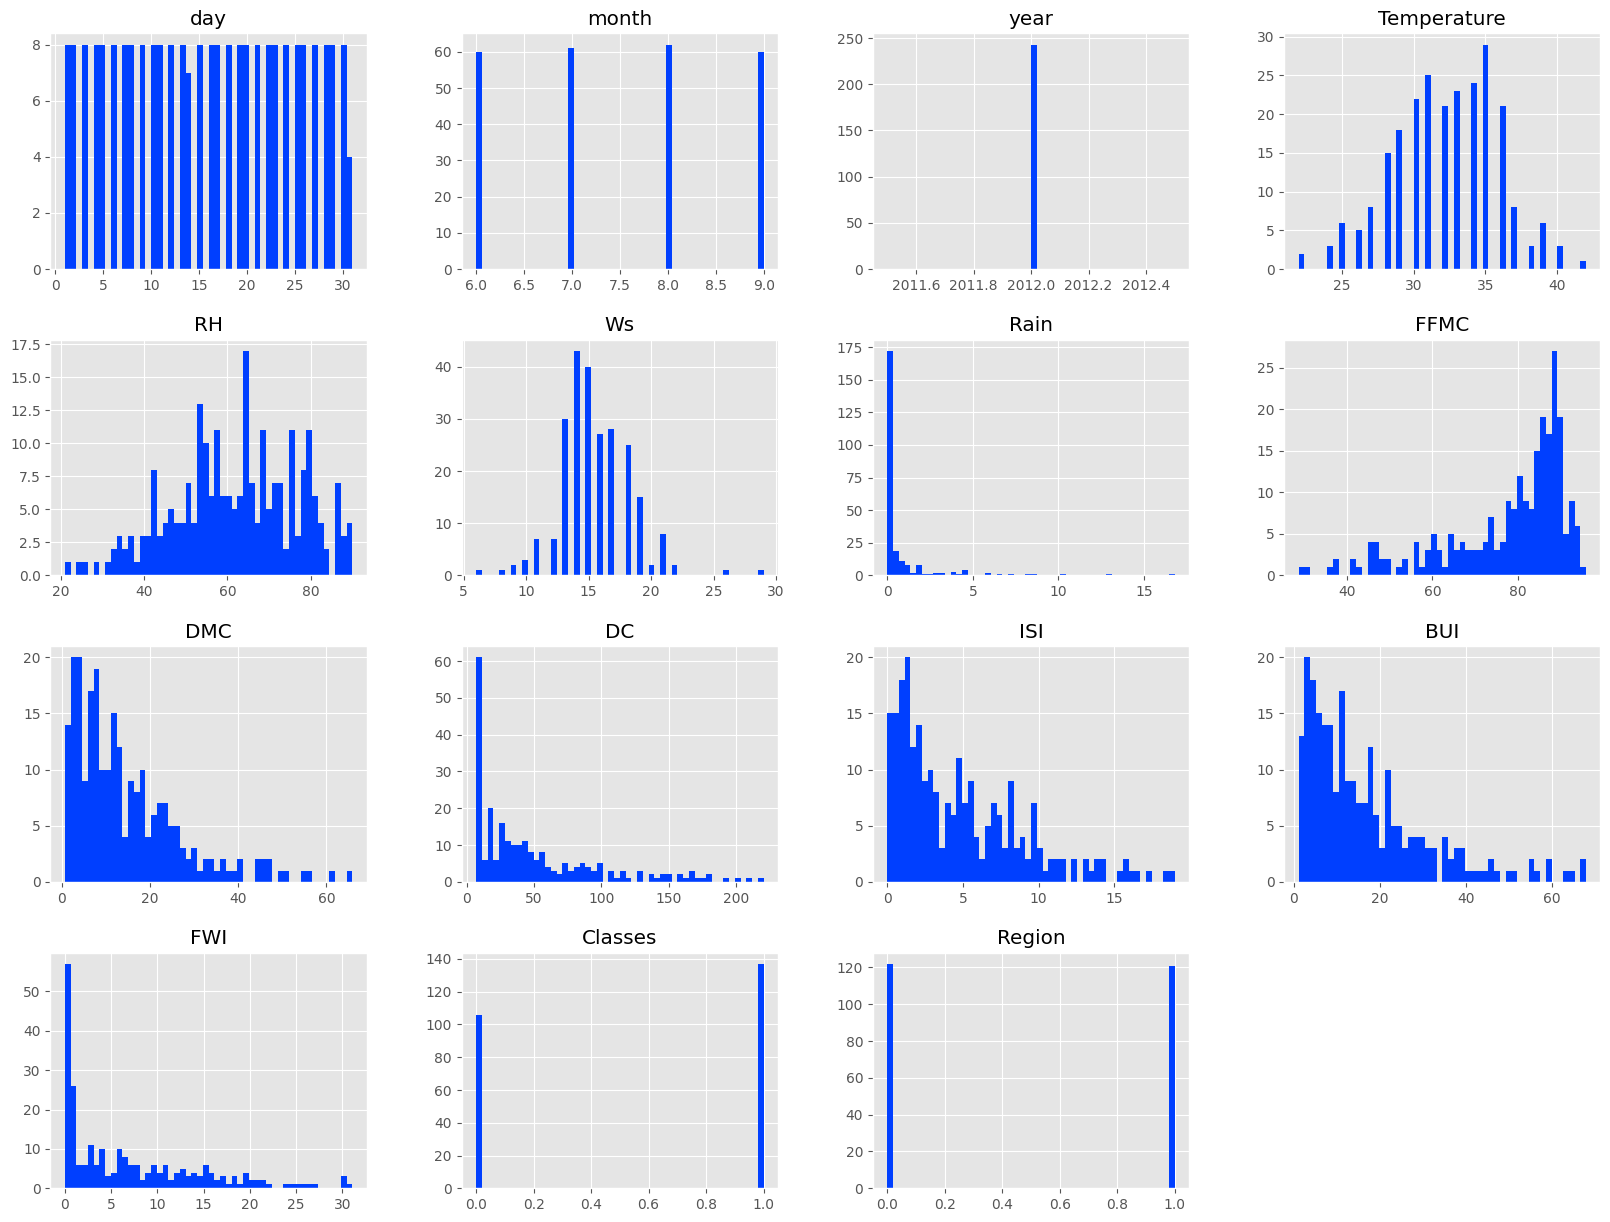

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt
# historgram
plt.style.use('seaborn-v0_8-bright')
df2.hist(bins=50,figsize=(20,15))
plt.show()

In [90]:
percentage = df2['Classes'].value_counts(normalize=True)*100

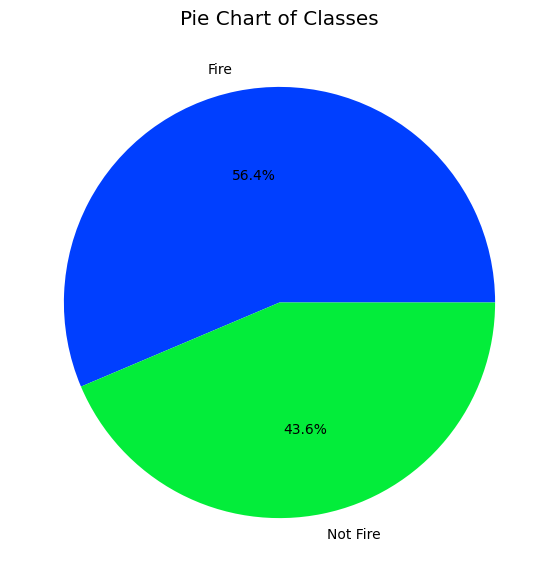

In [91]:

# plotting piechart
classlabels=["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classlabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [102]:
df4=df2.copy()

In [114]:
df4.drop(['day','month','year'], axis=1,inplace=True)

In [115]:
df4.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

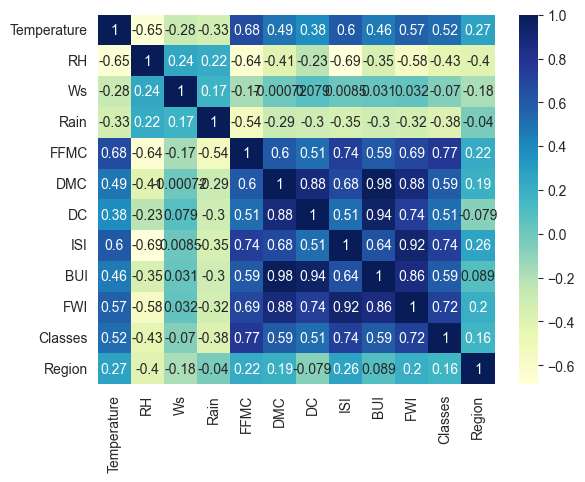

In [118]:
sns.heatmap(df4.corr(), cmap="YlGnBu",annot=True)

<Axes: ylabel='BUI'>

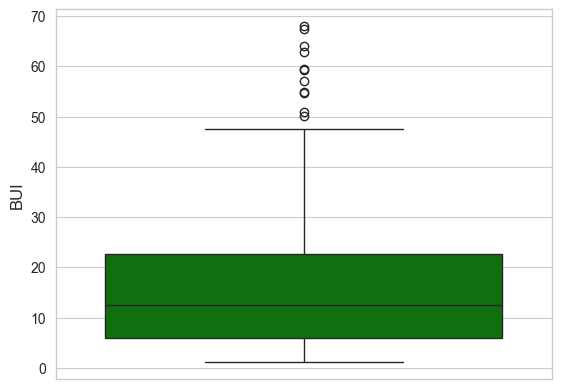

In [121]:
sns.boxplot(df['BUI'],color='green')

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

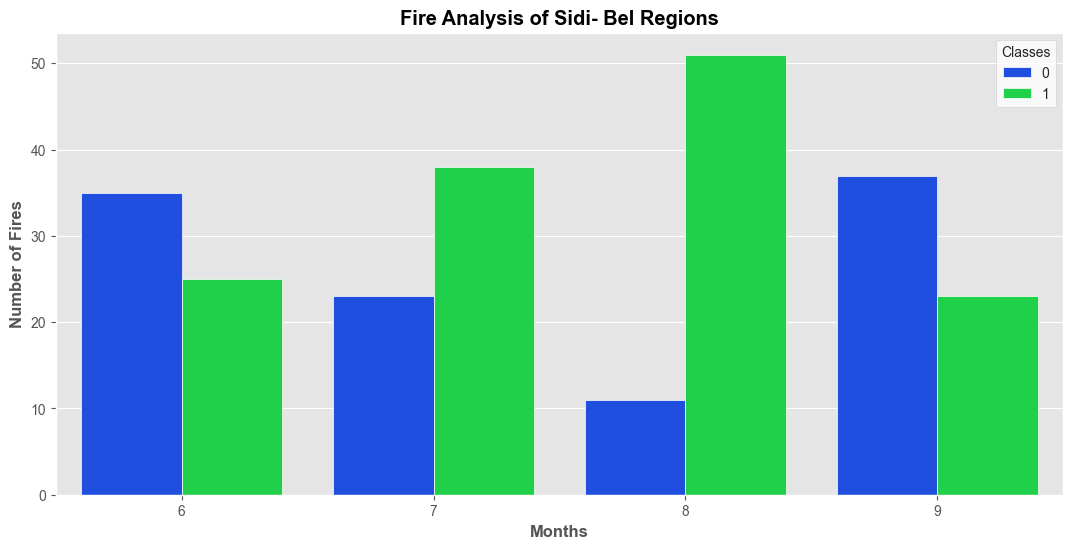

In [99]:

## Monthly Fire Analysis
dftemp=df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

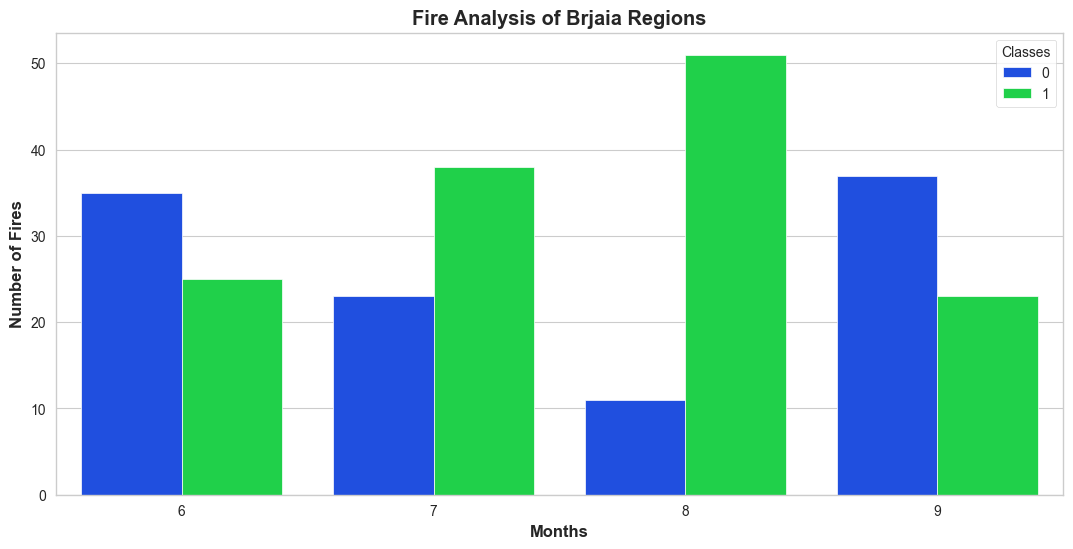

In [100]:

## Monthly Fire Analysis
dftemp=df.loc[df['Region']==0]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')